In [1]:
!pip install tensorflow



     |████████████████████████████████| 462 kB 13.7 MB/s 


In [2]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

In [8]:
X_train[0].shape

(28, 28)

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scale = MinMaxScaler()

In [11]:
# X_train_scale = scale.fit(X_train_flatten)
# X_test_scale = scale.fit(X_test_flatten)

In [12]:
X_train = X_train / 255
X_test = X_test / 255

In [13]:
X_train


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [14]:
X_train_flatten = X_train.reshape(len(X_train), 28*28)
X_test_flatten = X_test.reshape(len(X_test), 28*28)

In [15]:
X_train_flatten

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
X_test_flatten

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
model = keras.Sequential([
                          keras.layers.Dense(10, input_shape=(784,), activation="sigmoid")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train_flatten, y_train, epochs=7)

Epoch 1/7
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4674 - accuracy: 0.8783
Epoch 2/7
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3037 - accuracy: 0.9153
Epoch 3/7
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2833 - accuracy: 0.9207
Epoch 4/7
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2730 - accuracy: 0.9237
Epoch 5/7
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2666 - accuracy: 0.9263
Epoch 6/7
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2615 - accuracy: 0.9267
Epoch 7/7
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2582 - accuracy: 0.9283


In [18]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 0s 906us/step - loss: 0.2639 - accuracy: 0.9275


[0.2638986110687256, 0.9275000095367432]

In [19]:
y_predicted = model.predict(X_test_flatten)
y_predicted

array([[8.34906101e-03, 6.04219181e-08, 3.73864770e-02, ...,
        9.99796152e-01, 8.78897011e-02, 6.99499309e-01],
       [3.79686326e-01, 3.38724256e-03, 9.99725580e-01, ...,
        5.15143416e-14, 1.96477652e-01, 1.07611496e-10],
       [3.00437212e-04, 9.92516160e-01, 7.01044321e-01, ...,
        9.96460319e-02, 4.05570745e-01, 4.78923321e-02],
       ...,
       [1.34272409e-06, 5.93004870e-07, 1.01730227e-03, ...,
        2.38530844e-01, 5.50894678e-01, 8.00501108e-01],
       [3.84117702e-05, 7.38129020e-05, 7.35172071e-05, ...,
        3.69330519e-05, 7.04755425e-01, 4.92021718e-05],
       [1.96292996e-03, 2.47280165e-11, 1.27819121e-01, ...,
        9.88712889e-10, 1.68412924e-04, 1.36617885e-07]], dtype=float32)

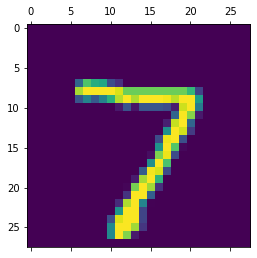

In [20]:
plt.matshow(X_test[0])

In [21]:
y_predicted

array([[8.34906101e-03, 6.04219181e-08, 3.73864770e-02, ...,
        9.99796152e-01, 8.78897011e-02, 6.99499309e-01],
       [3.79686326e-01, 3.38724256e-03, 9.99725580e-01, ...,
        5.15143416e-14, 1.96477652e-01, 1.07611496e-10],
       [3.00437212e-04, 9.92516160e-01, 7.01044321e-01, ...,
        9.96460319e-02, 4.05570745e-01, 4.78923321e-02],
       ...,
       [1.34272409e-06, 5.93004870e-07, 1.01730227e-03, ...,
        2.38530844e-01, 5.50894678e-01, 8.00501108e-01],
       [3.84117702e-05, 7.38129020e-05, 7.35172071e-05, ...,
        3.69330519e-05, 7.04755425e-01, 4.92021718e-05],
       [1.96292996e-03, 2.47280165e-11, 1.27819121e-01, ...,
        9.88712889e-10, 1.68412924e-04, 1.36617885e-07]], dtype=float32)

In [24]:
y_pred_labels = [np.argmax(i) for i in y_predicted]

In [27]:
import tensorflow as tf
con_matrix = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

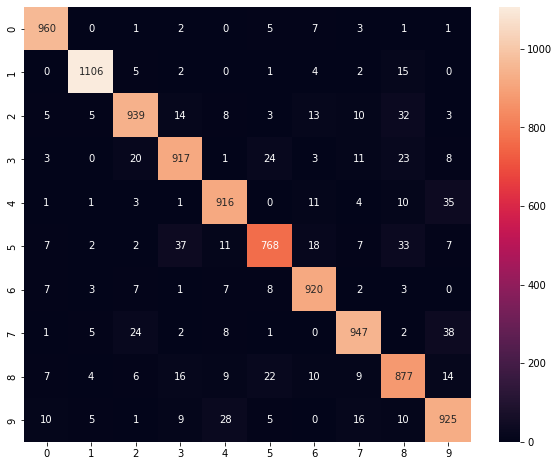

In [28]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(con_matrix,annot=True,fmt='d')

In [31]:
model1 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')])



In [32]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [33]:
model1.fit(X_train_flatten, y_train, epochs=5 )

model1.evaluate(X_test_flatten, y_test)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2773 - accuracy: 0.9212
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1247 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0875 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0669 - accuracy: 0.9798
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0955 - accuracy: 0.9723


[0.0955238863825798, 0.9722999930381775]

In [34]:
y_pred1 = model1.predict(X_test_flatten)
y_pred1_labels = [np.argmax(j) for j in y_pred1]

con_matrix1 = tf.math.confusion_matrix(labels=y_test,predictions=y_pred1_labels)

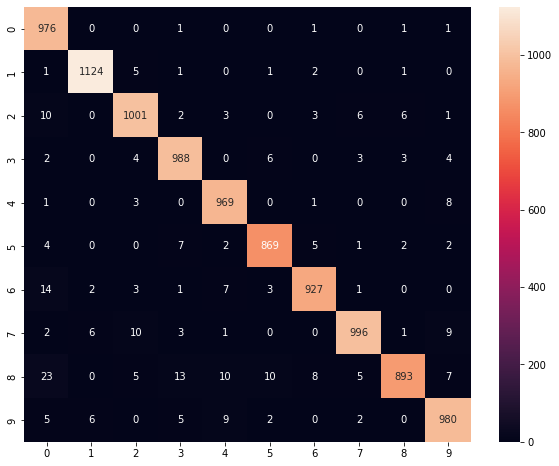

In [35]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(con_matrix1,annot=True,fmt='d')